In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset, ConcatDataset
import matplotlib.pyplot as plt
import numpy as np
from monai.networks.nets import UNet

In [10]:
import glob

glob.glob('C:\\Users\\sawye\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\torchvision\\datasets', recursive=True)

['C:\\Users\\sawye\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\torchvision\\datasets']

In [11]:
import os

if os.path.exists('C:\\Users\\sawye\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\torchvision\\datasets'):
    print("Dataset folder found!")
else:
    print("Dataset folder not found, check the path.")

Dataset folder found!


In [12]:
transform = transforms.Compose([
    transforms.Resize((150, 150)),
    transforms.ToTensor(),
    transforms.RandomHorizontalFlip(.5)
])
#gausianNoise
# If I make another transform function that uses the randomHorizontalFlip function for all the images
# and Noise function can I effectivly double my image dataset?

In [13]:
train_data = datasets.ImageFolder(root='C:\\Users\\sawye\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\torchvision\\datasets\\images-rock-and-snow', transform=transform)
train_loader = DataLoader(train_data, batch_size=1, shuffle=True)
# Make 2 datasets for both image files.
# make a list of dataloaders  
# Each entry in dataloaders is a concatinated version of either 10% or 20% of the total images in each of the image files 
# make another loop around the training loop that iterates through the dataloaders - 1 
# last dataloaders entry needs to be the testing dataset  
# Make a accuracy function so the code doesnt look gross 


print(train_data.imgs)

[('C:\\Users\\sawye\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\torchvision\\datasets\\images-rock-and-snow\\summerData\\summer\\summer0.jpg', 0), ('C:\\Users\\sawye\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\torchvision\\datasets\\images-rock-and-snow\\summerData\\summer\\summer1.jpg', 0), ('C:\\Users\\sawye\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\torchvision\\datasets\\images-rock-and-snow\\summerData\\summer\\summer10.jpg', 0), ('C:\\Users\\sawye\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\torchvision\\datasets\\images-rock-and-snow\\summerData\\summer\\summer11.jpg', 0), ('C:\\Users\\sawye\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\torchvision\\datasets\\images-rock-and-snow\\summerData\\summer\\summer12.jpg', 0), ('C:\\Users\\sawye\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\torchvision\\datasets\\images-rock-and-snow\\summerData\\summer\\summer

In [14]:
summer_path = 'C:\\Users\\sawye\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\torchvision\\datasets\\images-rock-and-snow\\summerData'
winter_path = 'C:\\Users\\sawye\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\torchvision\\datasets\\images-rock-and-snow\\winterData'
summer_data = datasets.ImageFolder(root=summer_path, transform= transform)
winter_data = datasets.ImageFolder(root=winter_path, transform= transform)
winter_data.targets = [target + 1 for target in winter_data.targets]

#make random seed 

k_folds = 5
indices = np.random.permutation(len(winter_data)) #not totally sure why I use a random permutation here, I just see it used as such in other cross validation code that I have found

foldsize = len(winter_data) // k_folds  #floor operator

fold_index = []  
for i in range(0, len(winter_data), foldsize):  
    fold = indices[i:i + foldsize]
    fold_index.append(fold)

train_dataloaders = []
test_dataloaders = []

for fold in range(k_folds):
    test_idx = fold_index[fold]
    train_idx = np.concatenate([fold_index[i] for i in range(k_folds) if i != fold])
    
    train_sub1 = Subset(summer_data, train_idx)
    test_sub1 = Subset(summer_data, test_idx)

    train_sub2 = Subset(winter_data, train_idx)
    test_sub2 = Subset(winter_data, test_idx)

    combined_train = ConcatDataset([train_sub1, train_sub2])
    combined_test = ConcatDataset([test_sub1, test_sub2])

    train_loader = DataLoader(combined_train, batch_size= 16, shuffle= True)
    test_loader = DataLoader(combined_test, batch_size= 16, shuffle= False)

    train_dataloaders.append(train_loader)
    test_dataloaders.append(test_loader)


In [15]:
print(winter_data.targets)
print(summer_data.targets)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [16]:
for i, batch in enumerate(train_dataloaders[1]):
        print(f"Batch {i + 1}:")
        print(batch)
        print(f"Shape: {batch.shape}")

Batch 1:
[tensor([[[[0.0824, 0.1490, 0.2627,  ..., 0.4902, 0.5020, 0.5059],
          [0.0745, 0.1020, 0.3412,  ..., 0.4941, 0.5176, 0.5137],
          [0.1686, 0.1569, 0.4941,  ..., 0.4941, 0.4941, 0.4745],
          ...,
          [0.1569, 0.1922, 0.2745,  ..., 0.5137, 0.4706, 0.4353],
          [0.2039, 0.2431, 0.3451,  ..., 0.5176, 0.5098, 0.5216],
          [0.2353, 0.2235, 0.3490,  ..., 0.4824, 0.5020, 0.5216]],

         [[0.0627, 0.1294, 0.2471,  ..., 0.5490, 0.5686, 0.5804],
          [0.0588, 0.0824, 0.3255,  ..., 0.5529, 0.5843, 0.5882],
          [0.1529, 0.1373, 0.4784,  ..., 0.5529, 0.5608, 0.5490],
          ...,
          [0.1725, 0.2078, 0.2863,  ..., 0.4941, 0.4392, 0.3961],
          [0.2196, 0.2588, 0.3569,  ..., 0.4941, 0.4784, 0.4824],
          [0.2510, 0.2392, 0.3569,  ..., 0.4588, 0.4706, 0.4824]],

         [[0.0431, 0.1137, 0.2392,  ..., 0.6431, 0.6784, 0.6980],
          [0.0471, 0.0706, 0.3176,  ..., 0.6549, 0.6941, 0.7098],
          [0.1333, 0.1255, 0.470

AttributeError: 'list' object has no attribute 'shape'

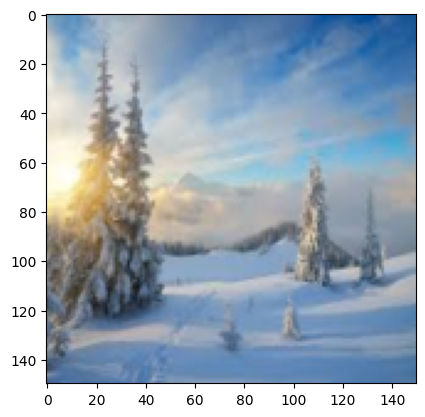

In [21]:
hold = next(iter(winter_data))[0]
plt.imshow(transforms.ToPILImage()(hold))

#hold = [*iter(winter_data)][0]
#plt.imshow(transforms.ToPILImage()(hold))

In [22]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * 37* 37, 512)
        self.fc2 = nn.Linear(512, 1)
        
    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 37 * 37)
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x


In [23]:
model = CNN()
criterion = nn.BCELoss()


In [ ]:
# reinitialize the model between folds

num_epochs = 10
c = 1
acc_total = []
for i in range(k_folds):
    model = CNN()
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    print(f'Fold {c}/{k_folds}')
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0.0
        for inputs, labels in train_dataloaders[fold]:
            labels = labels.float().view(-1, 1)  # Convert labels to float and reshape
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss / len(train_dataloaders[fold]):.4f}')

    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_dataloaders[fold]:
            outputs = model(inputs)
            predicted = (outputs > 0.5).float()
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    accuracy = 100 * correct / 64
    acc_total.append(accuracy)
    print(f'Accuracy for fold {i+1}: {accuracy:.2f}%\n')
    c += 1

print(f'Average Accuracy :{sum(acc_total) / 5}')
torch.save(model.state_dict(), 'mymodel.pth')
print("Model saved on the 5th fold")

#make a independent validation set
#Make an infrince program based off this model - need to save and load this model so you can apply the predictions



Fold 1/5
Epoch [1/10], Loss: 0.3571
Epoch [2/10], Loss: 0.0000
Epoch [3/10], Loss: 0.0000
Epoch [4/10], Loss: 0.0000
Epoch [5/10], Loss: 0.0000
Epoch [6/10], Loss: 0.0000
Epoch [7/10], Loss: 0.0000
Epoch [8/10], Loss: 0.0000
Epoch [9/10], Loss: 0.0000
Epoch [10/10], Loss: 0.0000
Accuracy for fold 1: 100.00%

Fold 2/5
Epoch [1/10], Loss: 0.3353
Epoch [2/10], Loss: 0.0000
Epoch [3/10], Loss: 0.0000
Epoch [4/10], Loss: 0.0000
Epoch [5/10], Loss: 0.0000
Epoch [6/10], Loss: 0.0000
Epoch [7/10], Loss: 0.0000
Epoch [8/10], Loss: 0.0000
Epoch [9/10], Loss: 0.0000
Epoch [10/10], Loss: 0.0000
Accuracy for fold 2: 100.00%

Fold 3/5
Epoch [1/10], Loss: 0.3580
Epoch [2/10], Loss: 0.0000
Epoch [3/10], Loss: 0.0000
Epoch [4/10], Loss: 0.0000
Epoch [5/10], Loss: 0.0000
Epoch [6/10], Loss: 0.0000
Epoch [7/10], Loss: 0.0000
Epoch [8/10], Loss: 0.0000
Epoch [9/10], Loss: 0.0000
Epoch [10/10], Loss: 0.0000
Accuracy for fold 3: 100.00%

Fold 4/5
Epoch [1/10], Loss: 0.3292
Epoch [2/10], Loss: 0.0000
Epoch [

In [ ]:
final_path = 'C:\\Users\\sawye\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\torchvision\\datasets\\imageValidate'
final_data = datasets.ImageFolder(root=final_path, transform= transform)
final_loader = DataLoader(final_data, batch_size= 16, shuffle= False)
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in final_loader:
        outputs = model(inputs)
        predicted = (outputs > 0.5).float()
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

accuracy = 100 * correct / 128
print(f'Independent Validation set accuracy : {accuracy}')


Independent Validation set accuracy : 100.0


In [157]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

net = UNet(
   spatial_dims=2,
   in_channels=1,
   out_channels=1,
   channels=(16, 32, 64, 128, 256),
   strides=(2, 2, 2, 2),
   num_res_units=2,
).to(device)

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Transformations for the images
transform = transforms.Compose([
    transforms.Resize((150, 150)),
    transforms.ToTensor(),
])

# Load the dataset
train_data = datasets.ImageFolder(root='dataset/', transform=transform)
train_loader = DataLoader(train_data, batch_size=1, shuffle=True)

# Define a simple CNN model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * 75 * 75, 512)
        self.fc2 = nn.Linear(512, 1)
    
    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 75 * 75)
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

# Instantiate the model, define the loss function and the optimizer
model = SimpleCNN()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        labels = labels.float().view(-1, 1)  # Convert labels to float and reshape
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Plotting a sample output after training
inputs, labels = next(iter(train_loader))
output = model(inputs).item()
predicted = 'rock_with_snow' if output > 0.5 else 'rock'

plt.imshow(inputs[0].permute(1, 2, 0))
plt.title(f'Predicted: {predicted}, True: {"rock_with_snow" if labels.item() == 1 else "rock"}')
plt.show()
